# Dataset - IRIS FLOWER CLASSIFICATION

- Task

    - Importing Libraries
    - Preprocessing Part
        * Missing Value checking
        * Outlier Checking
    - Exploratory Data Analysis
    - Algorithm
        * Logistic Regression
        * Decision Tree
        * RandomForestClassifier()
        * GradientBoostingClassifier()
        * BaggingClassifier()
        * AdaBoostClassifier()
    


# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Loading of Data

In [2]:
dm = pd.read_csv("IRIS.csv")

In [3]:
dm.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dm.shape

(150, 5)

## checking duplicate value

In [5]:
dm.duplicated().sum()

3

In [6]:
dm.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
dm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# checking null

In [8]:

dm.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
num= dm.select_dtypes(exclude="object")

##  checking outlier

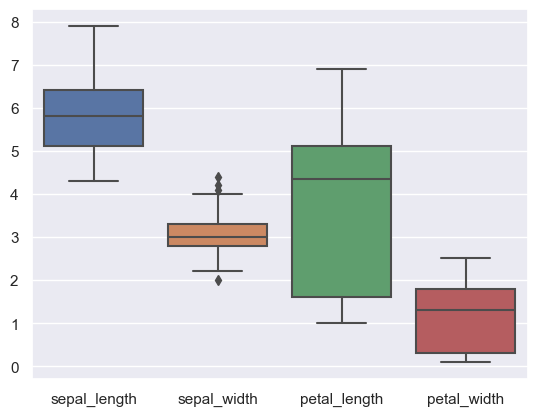

In [10]:

sns.boxplot(data = num)
plt.show()

In [11]:
 dm["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
# changing species into numerical value

In [13]:
 dm["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# EDA

In [14]:
dm.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


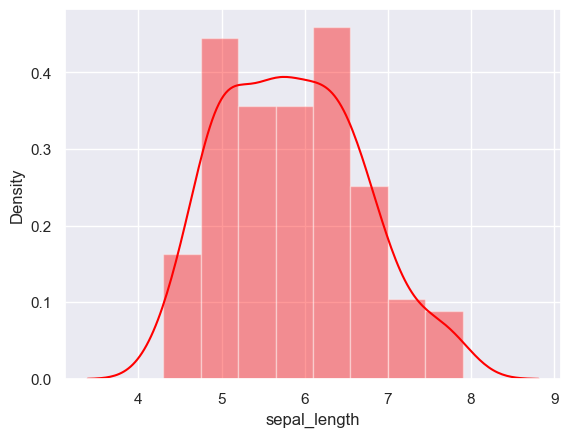

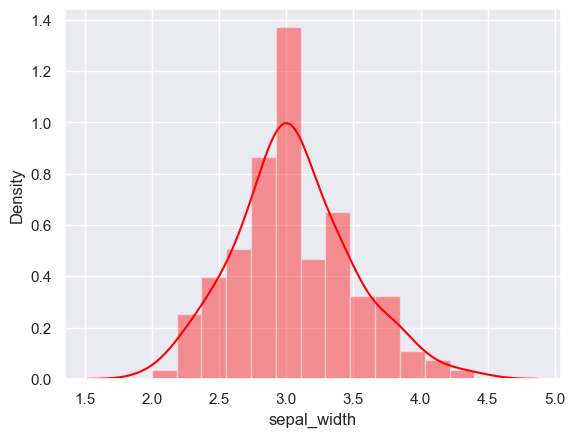

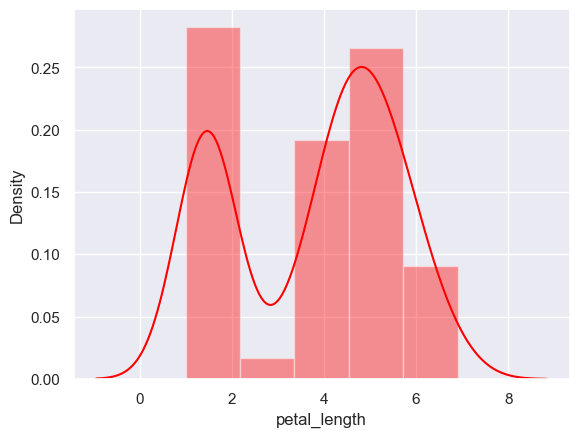

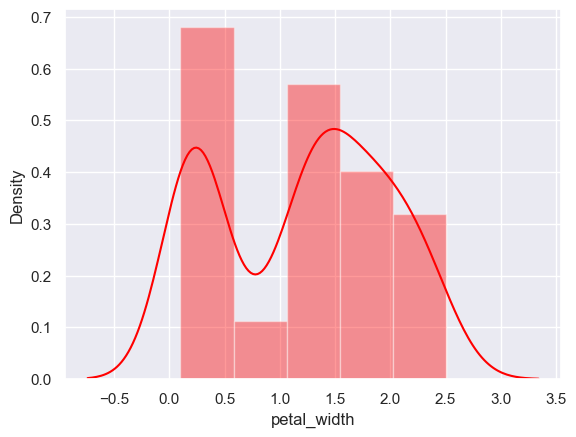

In [15]:
for i in dm.select_dtypes(exclude="object"):
    sns.distplot(dm[i], color="red")
    plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

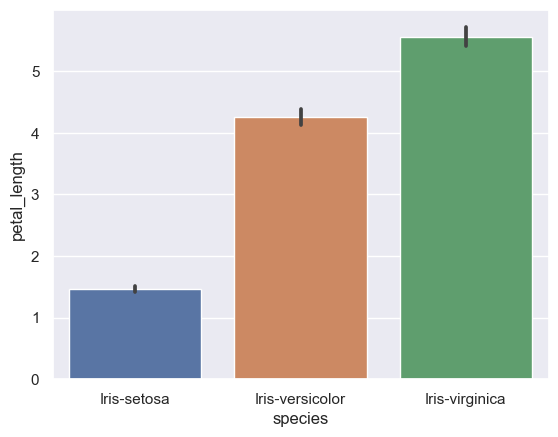

In [16]:
sns.barplot(x= "species", y= "petal_length", data=dm)

Iris-virginica specie have high petal length

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

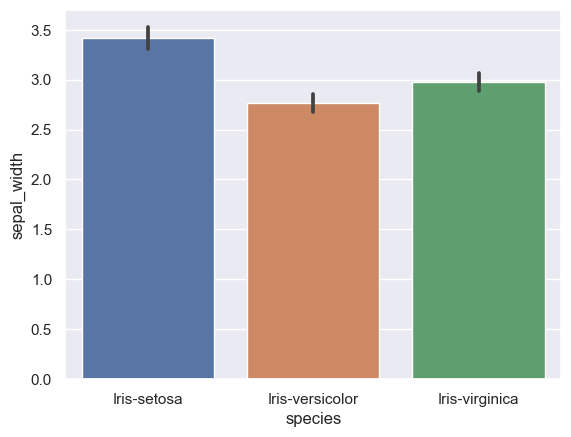

In [17]:
sns.barplot(x= "species", y= "sepal_width", data=dm)

not so much difference in all species acc to sepal width

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

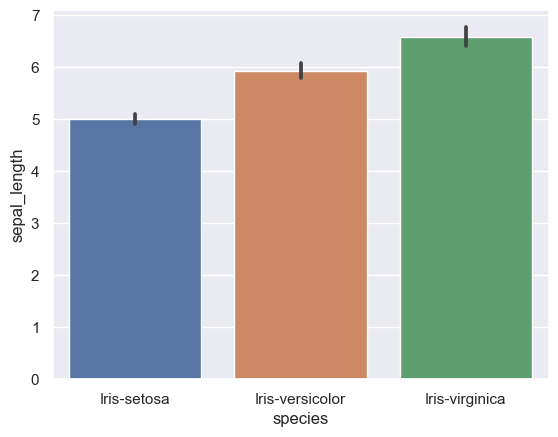

In [18]:
sns.barplot(x= "species", y= "sepal_length", data=dm)

not so much difference in all species acc to sepal length

<AxesSubplot:xlabel='species', ylabel='petal_width'>

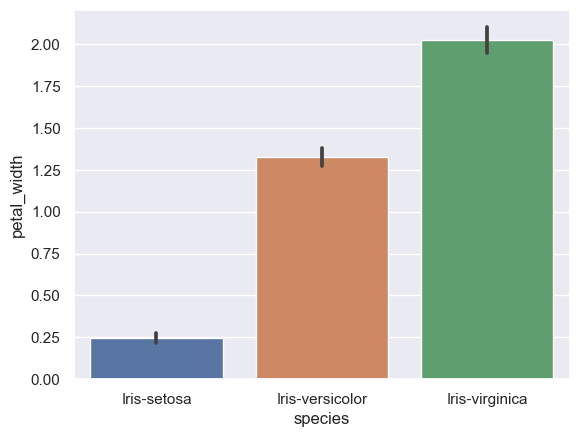

In [19]:
sns.barplot(x= "species", y= "petal_width", data=dm)

in petal_width Iris-setosa is so low and Iris-virginica is so high

In [20]:
dm["species"] = np.where(dm["species"] == "Iris-setosa", 0,
                         np.where(dm["species"] == "Iris-versicolor", 1,
                                  np.where(dm["species"] == "Iris-virginica", 2, dm["species"])))

Iris-setosa       0
Iris-versicolor   1
Iris-virginica    2

# checking heatmap

<AxesSubplot:>

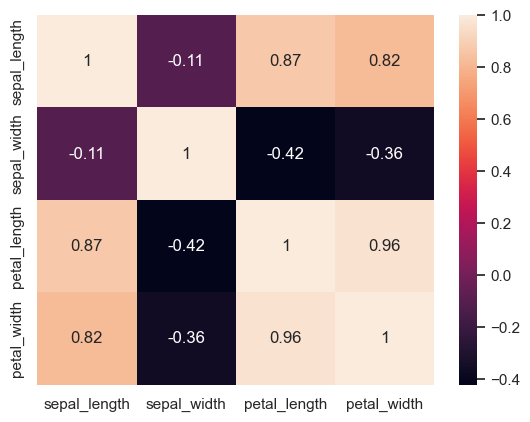

In [22]:
sns.heatmap(dm.corr(), annot=True)

In [23]:
# here petal_length and petal_width is highly correlated with each other we have to drop one column
dm= dm.drop("petal_length", axis=1)

In [24]:
dm.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


# seprate x and y variable

In [25]:
x= dm.drop("species",axis=1)
y= dm[["species"]]

In [26]:
x.head()

,sepal_length,sepal_width,petal_width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


In [27]:
y["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [28]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [29]:
y['species'] = pd.to_numeric(y['species'], errors='coerce')

# splitting into train and test

In [30]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 32, stratify=y)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 3), (30, 3), (120, 1), (30, 1))

1st algorithm

In [32]:
y_test

,species
104,2
91,1
37,0
43,0
25,0
97,1
107,2
19,0
24,0
131,2


# logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(multi_class='ovr')
logit.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

# prediction

In [34]:
train_pred_log = logit.predict(x_train)
test_pred_log = logit.predict(x_test)

In [35]:
test_pred_log

array([2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 1], dtype=int64)

# validation

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
con_train = "confusion matrix: \n" + str(confusion_matrix(y_train, train_pred_log))
con_test = "confusion matrix: \n" + str(confusion_matrix(y_test, test_pred_log))
print(con_train)
print(con_test)

confusion matrix: 
[[40  0  0]
 [ 0 33  7]
 [ 0  3 37]]
confusion matrix: 
[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]


In [38]:
con_train = "classification report: \n" + str(classification_report(y_train, train_pred_log))
con_test = "classification report: \n" + str(classification_report(y_test, test_pred_log))
print(con_train)
print(con_test)

classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      0.82      0.87        40
           2       0.84      0.93      0.88        40

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [39]:
con_train = "accuracy_score: \n" + str(accuracy_score(y_train, train_pred_log))
con_test = "accuracy_score: \n" + str(accuracy_score(y_test, test_pred_log))
print(con_train)
print(con_test)

accuracy_score: 
0.9166666666666666
accuracy_score: 
0.9


# cross validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
train_acc = np.mean(cross_val_score(logit, x_train , y_train,cv=10))
test_acc = np.mean(cross_val_score(logit , x_test , y_test, cv=10))
print(train_acc)
print(test_acc)

0.9083333333333334
0.9666666666666666


# approach no. 2 ( Decision tree)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

# prediction

In [44]:
train_prd_dt = dt.predict(x_train)
test_pred_dt = dt.predict(x_test)
print(train_prd_dt)
print(test_pred_dt)

[0 1 1 0 0 1 1 2 2 0 1 1 2 1 1 2 1 1 1 2 0 0 2 2 1 0 2 1 1 1 0 0 2 2 2 2 1
 0 0 1 2 0 1 2 0 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0 0 0 2 0 2 1 0 2 2 0 0 0 1 2
 2 1 1 1 2 1 2 0 2 2 2 1 0 2 1 2 1 1 2 0 0 1 1 2 1 0 2 0 0 0 2 1 1 1 0 1 1
 0 0 1 0 2 2 2 0 0]
[2 1 0 0 0 1 2 0 0 2 2 1 1 2 0 0 1 2 2 0 0 0 2 2 2 1 2 1 2 1]


In [45]:
con_test1 = "confusion matrix test: \n" + str(confusion_matrix(y_test, test_pred_dt))
print(con_test1)

confusion matrix test: 
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


In [46]:
con_train1 = "confusion matrix_train: \n" + str(confusion_matrix(y_train,train_prd_dt))
print(con_train1)

confusion matrix_train: 
[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


In [47]:
con_train = "accuracy_score_train: \n" + str(accuracy_score(y_train, train_prd_dt))
con_test = "accuracy_score_test: \n" + str(accuracy_score(y_test, test_pred_dt))
print(con_train)
print(con_test)

accuracy_score_train: 
1.0
accuracy_score_test: 
0.9333333333333333


# cross validation

In [48]:
train_cor = np.mean(cross_val_score(dt, x_train, y_train, cv=10))
test_cor = np.mean(cross_val_score(dt, x_test, y_test, cv=10))
print(train_cor)
print(test_cor)

0.9333333333333332
0.9


# plot

In [49]:
dm.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


In [50]:
y1 = y.copy()

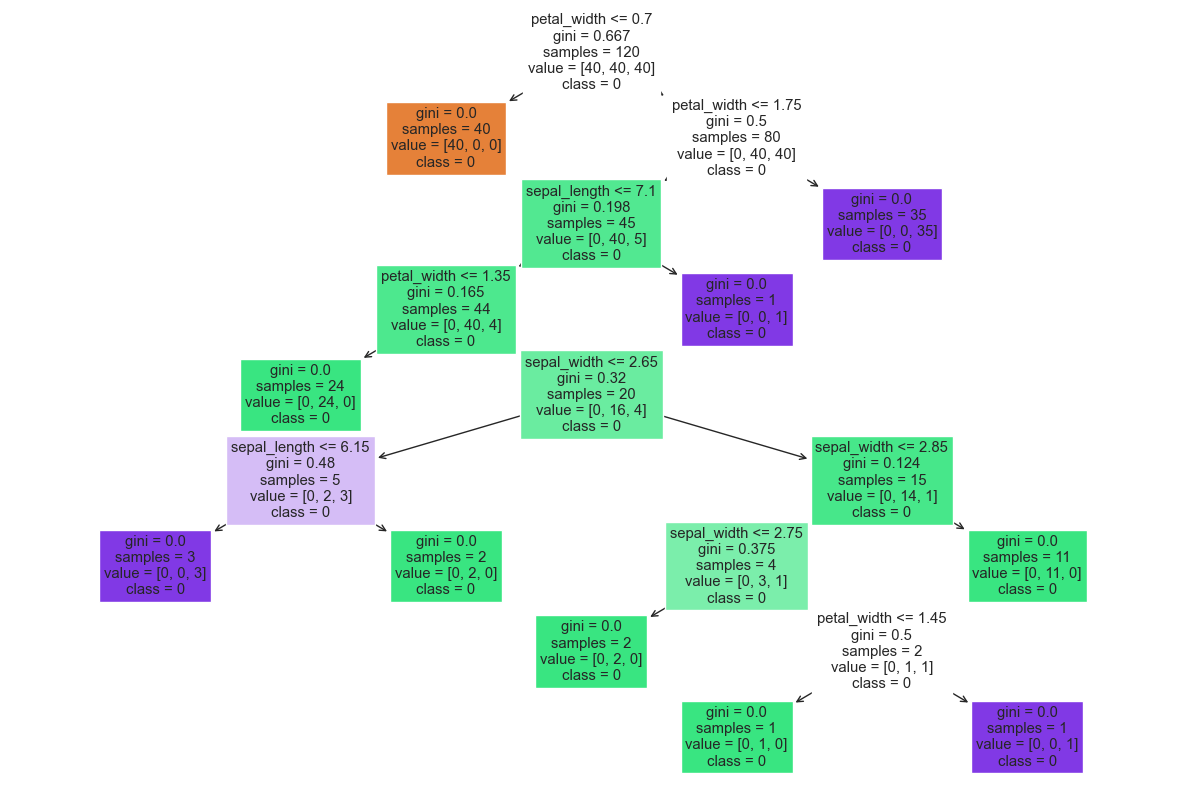

In [61]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=dm.species.astype(str))
plt.show()+

In [73]:
from sklearn.tree import  export_text
explain= export_text(dt, feature_names= x.columns.tolist())
print(explain)

|--- petal_width <= 0.70
|   |--- class: 0
|--- petal_width >  0.70
|   |--- petal_width <= 1.75
|   |   |--- sepal_length <= 7.10
|   |   |   |--- petal_width <= 1.35
|   |   |   |   |--- class: 1
|   |   |   |--- petal_width >  1.35
|   |   |   |   |--- sepal_width <= 2.65
|   |   |   |   |   |--- sepal_length <= 6.15
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- sepal_length >  6.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_width >  2.65
|   |   |   |   |   |--- sepal_width <= 2.85
|   |   |   |   |   |   |--- sepal_width <= 2.75
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- sepal_width >  2.75
|   |   |   |   |   |   |   |--- petal_width <= 1.45
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- petal_width >  1.45
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- sepal_width >  2.85
|   |   |   |   |   |   |--- class: 1
|   |   |--- sepal_length >  7.10
|   |   |   |--

# approach 3

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier

In [75]:
rf = RandomForestClassifier()
gd = GradientBoostingClassifier()
bg = BaggingClassifier()
ada = AdaBoostClassifier()

In [80]:
for model in [rf, gd, bg, ada]:
    print("performance", model)
    abc = model.fit(x_train, y_train)
    y_pred_train = abc.predict(x_train)
    y_pred_test = abc.predict(x_test)
    train_acc1 = accuracy_score(y_train, y_pred_train)
    test_acc1 = accuracy_score(y_test, y_pred_test)
    train_acc_cl = classification_report(y_train, y_pred_train)
    test_acc_cl = classification_report(y_test, y_pred_test)
    print(train_acc1)
    print(test_acc1)
        print("****"*10)
    print(train_acc_cl)
    print(test_acc_cl)

performance RandomForestClassifier()
1.0
0.9333333333333333
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

performance GradientBoostingClassifier()
1.0
0.9333333333333333
****************************************
              precision    recal

# cross validation

In [82]:

estimator = [("rf",rf), ("dt", dt), ("bg", bg), ("ada", ada)]

In [109]:

for estimat in estimator:
    train_cr = np.mean(cross_val_score(estimat[1], x_train, y_train, cv=10))
    test_cr = np.mean(cross_val_score(estimat[1], x_test, y_test, cv=10))
    print(estimat)
    print(train_cr)
    print(test_cr)
    print(" ")

('rf', RandomForestClassifier())
0.9249999999999998
0.9666666666666666
 
('dt', DecisionTreeClassifier())
0.9166666666666666
0.9
 
('bg', BaggingClassifier())
0.9333333333333332
0.9
 
('ada', AdaBoostClassifier())
0.9249999999999998
0.9
 


# conclusion 
in this project our  best algorith is logistic reg and adaboost classifier other than this we can apply any other algorithm also i checked with cross validation and all are good apart from overfitting prbl in some algorithm which are coming exactly 1 in test data